<figure>
<img src="../Imagenes/logo-final-ap.png"  width="80" height="80" align="left"/> 
</figure>

# <span style="color:#4361EE"><left>Aprendizaje Profundo</left></span>

# <span style="color:red"><center>Diplomado en Inteligencia Artificial y Aprendizaje Profundo</center></span>

# <span style="color:green"><center>Predicción del valor de una acción a tres días</center></span>

**<center>Aplicaciones de Redes LSTM</center>**

## <span style="color:#4361EE">Profesores</span>

1. Alvaro  Montenegro, PhD, ammontenegrod@unal.edu.co
1. Camilo José Torres Jiménez, Msc, cjtorresj@unal.edu.co
1. Daniel  Montenegro, Msc, dextronomo@gmail.com 

## <span style="color:#4361EE">Asesora Medios y Marketing digital</span>

4. Maria del Pilar Montenegro, pmontenegro88@gmail.com
5. Jessica López Mejía, jelopezme@unal.edu.co
6. Venus Puertas, vpuertasg@unal.edu.co

## <span style="color:#4361EE">Jefe Jurídica</span>

7. Paula Andrea Guzmán, guzmancruz.paula@gmail.com

## <span style="color:#4361EE">Coordinador Jurídico</span>

8. David Fuentes, fuentesd065@gmail.com

## <span style="color:#4361EE">Desarrolladores Principales</span>

9. Dairo Moreno, damoralesj@unal.edu.co
10. Joan Castro, jocastroc@unal.edu.co
11. Bryan Riveros, briveros@unal.edu.co
12. Rosmer Vargas, rovargasc@unal.edu.co

## <span style="color:#4361EE">Expertos en Bases de Datos</span>

13. Giovvani Barrera, udgiovanni@gmail.com
14. Camilo Chitivo, cchitivo@unal.edu.co

## <span style="color:#4361EE">Referencias</span>

1. [Introducción a Redes LSTM](Intro_LSTM.ipynb)
1. [Time Series Forecasting with LSTMs using TensorFlow 2 and Keras in Python](https://towardsdatascience.com/time-series-forecasting-with-lstms-using-tensorflow-2-and-keras-in-python-6ceee9c6c651/)
1. [Dive into Deep Learnig](https://d2l.ai/)
1. [Understanding LSTM Networks](https://colah.github.io/posts/2015-08-Understanding-LSTMs/)
1. Ralf C. Staudemeyer and Eric Rothstein Morris,[*Understanding LSTM a tutorial into Long Short-Term Memory Recurrent Neural Networks*](https://arxiv.org/pdf/1909.09586.pdf), arxiv, September 2019
1. Karpathy, [*The Unreasonable Effectiveness of Recurrent Neural Networks*](http://karpathy.github.io/2015/05/21/rnn-effectiveness/)
1. Anton Lucanus, [Making Automation More Efficient by Learning from Historical Trade Data](https://datafloq.com/read/making-automation-more-efficient-by-learning-from-/7444), 8:43 AM, January 7, 2020
1. https://www.analyticsvidhya.com/blog/2018/10/predicting-stock-price-machine-learningnd-deep-learning-techniques-python/
1. https://www.youtube.com/watch?v=2BrpKpWwT2A&list=PLQVvvaa0QuDcOdF96TBtRtuQksErCEBYZ&index=1
1. https://towardsdatascience.com/using-lstms-for-stock-market-predictions-tensorflow-9e83999d4653
1. https://github.com/llSourcell/Reinforcement_Learning_for_Stock_Prediction/blob/master/README.md
1. [Python: How to Get Live Market Data (Less Than 0.1-Second Lag](https://towardsdatascience.com/python-how-to-get-live-market-data-less-than-0-1-second-lag-c85ee280ed93)

## <span style="color:#4361EE">Contenido</span>

* [Introducción](#Introducción)
* [Importar las librería requeridas](#Importar-las-librería-requeridas)
* [Funciones-para-graficar-predicciones](#Funciones-para-graficar-predicciones)
* [Lectura de los datos](#Lectura-de-los-datos)
* [Extrae datos para la serie que se desea predecir-close](#Extrae-datos-para-la-serie-que-se-desea-predecir-close)
* [Visualización de la serie precio al cierre](#Visualización-de-la-serie-precio-al-cierre)
* [Preparación de los datos para el entrenamiento](#Preparación-de-los-datos-para-el-entrenamiento)
* [Crea el modelo LSTM](#Crea-el-modelo-LSTM)
* [Predicciones](#Predicciones)
* [Guarda el modelo entrenado](#Guarda-el-modelo-entrenado)
* [Intervalos de confianza. TO DO](#Intervalos-de-confianza.-TO-DO)

## <span style="color:#4361EE">Importar las librería requeridas</span>

In [440]:
import tensorflow as tf

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
from sklearn.preprocessing import MinMaxScaler

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#importing required libraries
from sklearn.preprocessing import MinMaxScaler

# importa objetos de keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, LSTM, Bidirectional
print("Versión de Tensorflow: ", tf.__version__)

# optimizador
from tensorflow.keras.optimizers import Adam
# Callbacks
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

Versión de Tensorflow:  2.9.2


## <span style="color:#4361EE">Lectura de  los datos</span>

### <span style="color:black">Yahoo Finance API</span>

Como las acciones van cambiando de valor todos los días, será mejor utilizar una API que nos dé información actualizada de la bolsa.

Para esto, usaremos la API de Yahoo Finance de la bolsa de valores.

In [441]:
#!pip install yfinance
import yfinance as yf

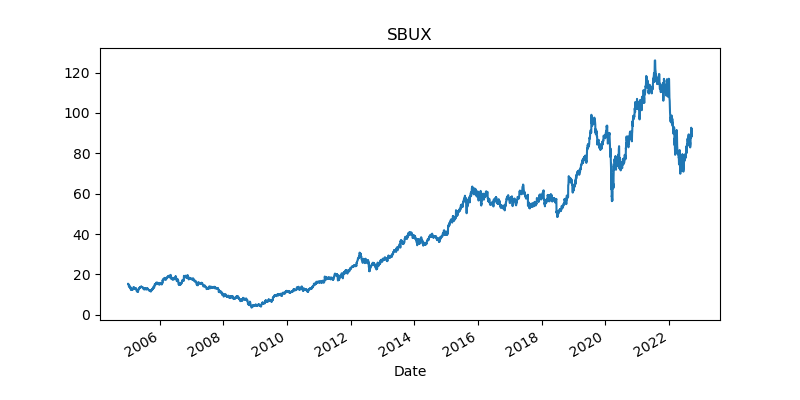

In [442]:
# Define Stock
stock = 'SBUX'

# Get data
data = yf.download(tickers=stock, period='max', interval='1d', progress=False, start='2005-01-01')

#Print data
#display(data)

#Plot data
plt.close('all')
plt.figure(figsize=(8,4))
data['Close'].plot(title=stock);

In [443]:
# looking at the first five rows of the data
print(f'\n Forma de los datos: {data.shape}\n')
data


 Forma de los datos: (4461, 6)



,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2005-01-03,15.822500,15.835000,15.142500,15.285000,12.346581,22233600
2005-01-04,15.422500,15.585000,15.227500,15.275000,12.338504,15898800
2005-01-05,15.252500,15.550000,15.155000,15.400000,12.439475,17782800
2005-01-06,14.897500,15.042500,14.525000,14.935000,12.063870,39010400
2005-01-07,15.000000,15.112500,14.762500,14.917500,12.049728,13331600
...,...,...,...,...,...,...
2022-09-15,92.089996,93.150002,91.730003,92.220001,92.220001,11052400
2022-09-16,91.150002,92.099998,90.650002,91.309998,91.309998,11984000
2022-09-19,90.889999,92.550003,90.830002,92.139999,92.139999,6287000


In [444]:
data_close = data[['Close']]
data_close.head()

,Close
Date,
2005-01-03,15.2850
2005-01-04,15.2750
2005-01-05,15.4000
2005-01-06,14.9350
2005-01-07,14.9175


Note cómo la API ya devuelve la información de manera amena, pero no tiene por qué ser así.

## <span style="color:#4361EE">Visualización de la serie precio al cierre</span>

In [445]:
# plot
len_data = len(data_close)
len_train = int(len_data*0.9) # 90%  = 9478 -> Depende de la fecha y acción elegida 
len_test = len_data - len_train # 20% = 1054 -> Depende de la fecha y acción elegida 
print (len_data, '=', len_train, '+',len_test)

4461 = 4014 + 447


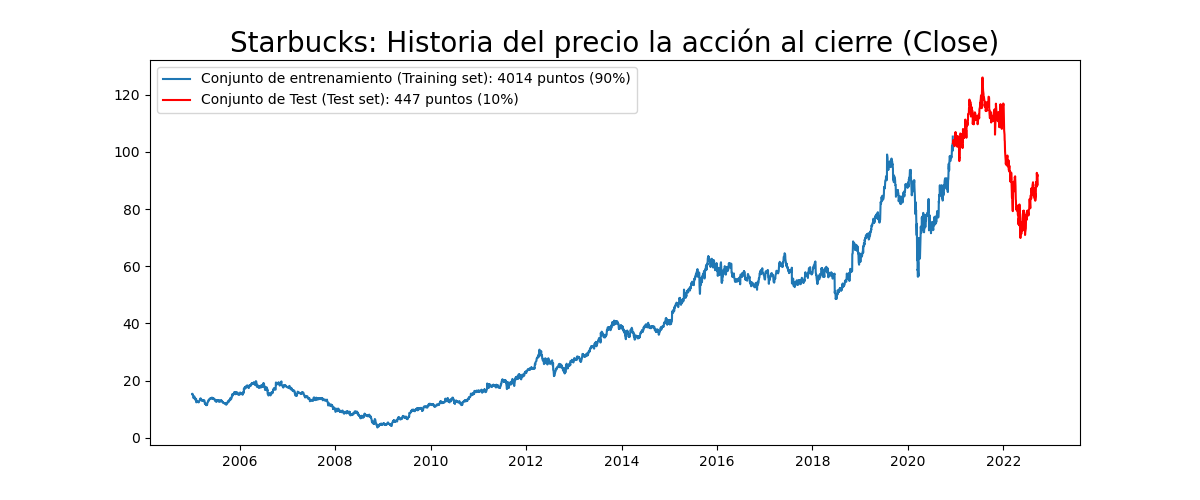

In [446]:
plt.figure(figsize=(12,5))
plt.plot(data_close[:len_train], label='Conjunto de entrenamiento (Training set): {} puntos (90%)'.format(len_train))
plt.plot(data_close['Close'][len_train:], label='Conjunto de Test (Test set): {} puntos (10%)'.format(len_test), color='r') 
plt.title("Starbucks: Historia del precio la acción al cierre (Close)", size = 20)
plt.legend()
plt.show()

## <span style="color:#4361EE">Preparación de los datos para el entrenamiento de la red LSTM</span>

Para evitar problemas con las tendencias y para mejorar la estimación (entrenamiento) los datos se van a transformar a la escala $[0,1]$. Para las predicciones se utiliza la transformación inversa.

### Primero extrae los valores y se crea el  objeto MinMaxScaler

In [447]:
#creating train and test sets
dataset = data_close.values

# create the scaler object and scale the data
scaler = MinMaxScaler(feature_range=(0,1))
# Scaled data
dataset = np.squeeze(np.array(scaler.fit_transform(dataset)),axis=1)

In [448]:
# Check ok
print(dataset.shape)
# Check ok in scaler
print(f'\nMin: {dataset.min()}, Max: {dataset.max()}')

(4461,)

Min: 0.0, Max: 1.0


### Crea datos de entrenamiento 

 La red LSTM tendrá como entrada "**time_step**" datos consecutivos, y como salida **1 dato** (la predicción a
 partir de esos "time_step" datos se hace para cada tercer día). 
 
 Se conformará de esta forma el set de entrenamiento

1. Número de datos consecutivos para entrenamiento: time_step = 60. 
2. Días a predecir: days = 1, pero cada 3 días.

### Función para crear los datos entrenamiento

In [449]:
def univariate_data(dataset, start_index, end_index, history_size, target_size):
    ''' dataset: conjunto de datos en forma de array
        start_index: índice inicial de donde empezar a tomar los datos
        end_index: índice final para tomar los datos. None para tomarlos todos
        history_size: tamaño de la ventana para crear las secuencias
        target_size: dentro de cuántas observaciones futuras desea pronosticar
    '''  
    data = []
    labels = []
    
    # Empezamos desfasados para tomar desde el incio de la serie
    start_index = start_index + history_size
    if end_index is None:
        # El último índice a tomar debe dejar espacio para el tamaño de la ventana
        end_index = len(dataset)

    for i in range(start_index, end_index-target_size+1):
        indices = range(i-history_size, i)
        # Reshape data from (history_size,) to (history_size, 1)
        data.append(np.reshape(dataset[indices], (history_size, 1)))
        # Etiquetas (Datos a predecir)
        labels.append(dataset[i+target_size-1])

    return np.array(data), np.array(labels)

Se coloca una semilla para garantizar reproducibilidad dentro de tensorflow

In [450]:
# Semilla
tf.random.set_seed(500)

In [451]:
# hiperparámetros para crear las secuencias
past_history = 60 # tamaño secuencias de entrada (Ventana de tiempo)
future_target = 4 # días adelante
TRAIN_SPLIT = len_train # nuḿero de datos entrenamiento

# secuencias de entrenamiento
X_train, y_train = univariate_data(dataset, start_index=0, 
                                            end_index=TRAIN_SPLIT,
                                            history_size=past_history,
                                            target_size=future_target)
#secuencias de test
# No se usará ningún dato que el modelo haya visto
X_test, y_test = univariate_data(dataset, TRAIN_SPLIT-past_history-future_target+1, None,
                                          past_history,
                                          future_target)

print(TRAIN_SPLIT)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

4014
(3951, 60, 1)
(3951,)
(447, 60, 1)
(447,)


In [452]:
# Visualize
train_df = pd.DataFrame(X_train[...,0], columns=[f'h_{i}' for i in range(past_history)])
pd.concat((train_df,pd.DataFrame(y_train, columns=['target'])),axis=1)

,h_0,h_1,h_2,h_3,h_4,h_5,h_6,h_7,h_8,h_9,...,h_51,h_52,h_53,h_54,h_55,h_56,h_57,h_58,h_59,target
0,0.095530,0.095448,0.096469,0.092672,0.092529,0.088773,0.087875,0.087120,0.083752,0.085466,...,0.077159,0.077934,0.077220,0.076179,0.075730,0.076567,0.077240,0.078036,0.078526,0.076342
1,0.095448,0.096469,0.092672,0.092529,0.088773,0.087875,0.087120,0.083752,0.085466,0.089018,...,0.077934,0.077220,0.076179,0.075730,0.076567,0.077240,0.078036,0.078526,0.076179,0.077138
2,0.096469,0.092672,0.092529,0.088773,0.087875,0.087120,0.083752,0.085466,0.089018,0.088610,...,0.077220,0.076179,0.075730,0.076567,0.077240,0.078036,0.078526,0.076179,0.075362,0.073811
3,0.092672,0.092529,0.088773,0.087875,0.087120,0.083752,0.085466,0.089018,0.088610,0.086283,...,0.076179,0.075730,0.076567,0.077240,0.078036,0.078526,0.076179,0.075362,0.075669,0.069973
4,0.092529,0.088773,0.087875,0.087120,0.083752,0.085466,0.089018,0.088610,0.086283,0.084385,...,0.075730,0.076567,0.077240,0.078036,0.078526,0.076179,0.075362,0.075669,0.076342,0.067708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3946,0.675117,0.668096,0.671770,0.663768,0.666952,0.678057,0.686875,0.692345,0.679037,0.664340,...,0.775791,0.770157,0.768932,0.762809,0.761747,0.773342,0.772525,0.776281,0.771055,0.805838
3947,0.668096,0.671770,0.663768,0.666952,0.678057,0.686875,0.692345,0.679037,0.664340,0.655685,...,0.770157,0.768932,0.762809,0.761747,0.773342,0.772525,0.776281,0.771055,0.777587,0.798734
3948,0.671770,0.663768,0.666952,0.678057,0.686875,0.692345,0.679037,0.664340,0.655685,0.656175,...,0.768932,0.762809,0.761747,0.773342,0.772525,0.776281,0.771055,0.777587,0.778322,0.797101
3949,0.663768,0.666952,0.678057,0.686875,0.692345,0.679037,0.664340,0.655685,0.656175,0.648336,...,0.762809,0.761747,0.773342,0.772525,0.776281,0.771055,0.777587,0.778322,0.788120,0.790488


In [453]:
print(dataset[:63].shape)
dataset[:63]

(63,)


array([0.0955297 , 0.09544805, 0.09646867, 0.09267198, 0.09252909,
       0.08877322, 0.08787508, 0.08711982, 0.08375179, 0.08546642,
       0.08901817, 0.08860992, 0.08628292, 0.08438457, 0.08077159,
       0.0809553 , 0.08369055, 0.0789753 , 0.08034293, 0.0809553 ,
       0.08166973, 0.0809553 , 0.07191264, 0.07413758, 0.0748316 ,
       0.0759951 , 0.07391304, 0.07315779, 0.07315779, 0.07248418,
       0.07383139, 0.07358645, 0.07238212, 0.07264748, 0.07203511,
       0.07258625, 0.07513779, 0.07517861, 0.076485  , 0.07805675,
       0.07852623, 0.08011839, 0.08185344, 0.08330272, 0.08209839,
       0.08209839, 0.08156767, 0.07993468, 0.08034293, 0.07960808,
       0.07699531, 0.0771586 , 0.07793427, 0.07721984, 0.07617881,
       0.07572974, 0.07656664, 0.07724025, 0.07803633, 0.07852623,
       0.07617881, 0.07536232, 0.0756685 ])

In [454]:
test_df = pd.DataFrame(X_test[...,0], columns=[f'h_{i}' for i in range(past_history)])
pd.concat((test_df,pd.DataFrame(y_test, columns=['target'])),axis=1)

,h_0,h_1,h_2,h_3,h_4,h_5,h_6,h_7,h_8,h_9,...,h_51,h_52,h_53,h_54,h_55,h_56,h_57,h_58,h_59,target
0,0.678057,0.686875,0.692345,0.679037,0.664340,0.655685,0.656175,0.648336,0.648745,0.659032,...,0.773342,0.772525,0.776281,0.771055,0.777587,0.778322,0.788120,0.805838,0.798734,0.811717
1,0.686875,0.692345,0.679037,0.664340,0.655685,0.656175,0.648336,0.648745,0.659032,0.673484,...,0.772525,0.776281,0.771055,0.777587,0.778322,0.788120,0.805838,0.798734,0.797101,0.814329
2,0.692345,0.679037,0.664340,0.655685,0.656175,0.648336,0.648745,0.659032,0.673484,0.663115,...,0.776281,0.771055,0.777587,0.778322,0.788120,0.805838,0.798734,0.797101,0.790488,0.821351
3,0.679037,0.664340,0.655685,0.656175,0.648336,0.648745,0.659032,0.673484,0.663115,0.672260,...,0.771055,0.777587,0.778322,0.788120,0.805838,0.798734,0.797101,0.790488,0.831231,0.813921
4,0.664340,0.655685,0.656175,0.648336,0.648745,0.659032,0.673484,0.663115,0.672260,0.678955,...,0.777587,0.778322,0.788120,0.805838,0.798734,0.797101,0.790488,0.831231,0.811717,0.813431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,0.576485,0.550031,0.557542,0.566442,0.569218,0.584732,0.608492,0.604981,0.594040,0.594774,...,0.657563,0.651766,0.657155,0.668014,0.647928,0.660829,0.691774,0.701164,0.694877,0.723699
443,0.550031,0.557542,0.566442,0.569218,0.584732,0.608492,0.604981,0.594040,0.594774,0.594448,...,0.651766,0.657155,0.668014,0.647928,0.660829,0.691774,0.701164,0.694877,0.697979,0.716269
444,0.557542,0.566442,0.569218,0.584732,0.608492,0.604981,0.594040,0.594774,0.594448,0.617881,...,0.657155,0.668014,0.647928,0.660829,0.691774,0.701164,0.694877,0.697979,0.687936,0.723046
445,0.566442,0.569218,0.584732,0.608492,0.604981,0.594040,0.594774,0.594448,0.617881,0.620004,...,0.668014,0.647928,0.660829,0.691774,0.701164,0.694877,0.697979,0.687936,0.727618,0.712023


In [455]:
print(dataset[-63:].shape)
dataset[-63:]

(63,)


array([0.58473156, 0.60849155, 0.60498062, 0.59403958, 0.59477446,
       0.59444785, 0.61788123, 0.62000407, 0.61461524, 0.6177179 ,
       0.6180445 , 0.60677692, 0.60563383, 0.60694019, 0.60922636,
       0.62082061, 0.62580122, 0.64474386, 0.65062256, 0.65282713,
       0.65323534, 0.63617066, 0.62645437, 0.64809145, 0.66205348,
       0.66295163, 0.66401311, 0.65421515, 0.68328229, 0.68009797,
       0.67070835, 0.67062668, 0.6634415 , 0.67691365, 0.68328229,
       0.69177383, 0.69871407, 0.70067363, 0.69210043, 0.69373345,
       0.68042457, 0.66433965, 0.66221681, 0.67332112, 0.6842621 ,
       0.65707287, 0.6575628 , 0.65176571, 0.65715453, 0.66801391,
       0.64792818, 0.66082873, 0.69177383, 0.70116351, 0.69487654,
       0.69797919, 0.6879363 , 0.72761787, 0.72369874, 0.71626862,
       0.72304553, 0.71202288, 0.69414166])

## <span style="color:#4361EE">Crea el modelo LSTM</span>

In [456]:
# shapes
input_shape = (X_train.shape[1], X_train.shape[2])
units = 50

# layers
inputs = Input(input_shape)
x = Dropout(0.2, name= 'Dropout_01')(inputs)
x = LSTM(units=units, name='LSTM_layer')(x)
#x = LSTM(units=units, return_sequences=True,name='LSTM_layer')(inputs)
#x = Dropout(0.4)
#x = LSTM(units=units//2, name='LSTM_layer_2')(x)
#x = Dropout(0.4)
x = Dropout(0.2, name= 'Dropout_02')(x)
outputs = Dense(1)(x)

# model
model_01 = Model(inputs=inputs, outputs=outputs, name='series_LSTM_model')
model_01.summary()

Model: "series_LSTM_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 60, 1)]           0         
                                                                 
 Dropout_01 (Dropout)        (None, 60, 1)             0         
                                                                 
 LSTM_layer (LSTM)           (None, 50)                10400     
                                                                 
 Dropout_02 (Dropout)        (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


###  Callbacks

In [457]:
import os
os.makedirs(f'../Checkpoints/{future_target}_dia', exist_ok=True)


checkpoint_filepath = f'../Checkpoints/{future_target}_dia'
checkpoint_callback = ModelCheckpoint(
 filepath=checkpoint_filepath,
 save_weights_only=False,
 monitor="val_loss",
 mode="min",
 save_best_only=True)

early_stopping_callback = EarlyStopping(
 monitor="val_loss",
 min_delta=0.005,
 patience=10,
 mode="min"
)

rlrop_callback = ReduceLROnPlateau(monitor='val_loss', factor=0.2, mode='min', patience=3, min_lr=0.0001)

###  Compila

Se usará el optimizador Adam y la función de pérdida MSE

In [458]:
model_01.compile(loss='mean_squared_error',
  optimizer=Adam(0.001))

### Entrena el modelo


In [459]:
epochs=30

history = model_01.fit(
    X_train, y_train,
    epochs=epochs,
    batch_size=32,
    validation_split=0.1,
    verbose=1,
    shuffle=True,
    callbacks=[early_stopping_callback, checkpoint_callback, rlrop_callback]
)

Epoch 1/30


2022-09-22 03:42:45.615602: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-09-22 03:42:45.802276: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-09-22 03:42:45.975551: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


112/112 [==============================] - ETA: 0s - loss: 0.0021

2022-09-22 03:42:49.831545: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-09-22 03:42:49.902736: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


INFO:tensorflow:Assets written to: ../Checkpoints/4_dia/assets


INFO:tensorflow:Assets written to: ../Checkpoints/4_dia/assets


112/112 [==============================] - 11s 83ms/step - loss: 0.0021 - val_loss: 0.0048 - lr: 0.0010
Epoch 2/30
111/112 [============================>.] - ETA: 0s - loss: 0.0049

INFO:tensorflow:Assets written to: ../Checkpoints/4_dia/assets


INFO:tensorflow:Assets written to: ../Checkpoints/4_dia/assets


112/112 [==============================] - 7s 65ms/step - loss: 0.0049 - val_loss: 0.0025 - lr: 0.0010
Epoch 3/30
112/112 [==============================] - ETA: 0s - loss: 0.0035

INFO:tensorflow:Assets written to: ../Checkpoints/4_dia/assets


INFO:tensorflow:Assets written to: ../Checkpoints/4_dia/assets


112/112 [==============================] - 7s 64ms/step - loss: 0.0035 - val_loss: 0.0018 - lr: 0.0010
Epoch 4/30
112/112 [==============================] - 2s 22ms/step - loss: 0.0031 - val_loss: 0.0018 - lr: 0.0010
Epoch 5/30
112/112 [==============================] - 2s 22ms/step - loss: 0.0026 - val_loss: 0.0064 - lr: 0.0010
Epoch 6/30
112/112 [==============================] - 2s 22ms/step - loss: 0.0019 - val_loss: 0.0083 - lr: 0.0010
Epoch 7/30
112/112 [==============================] - 3s 23ms/step - loss: 0.0036 - val_loss: 0.0028 - lr: 2.0000e-04
Epoch 8/30
112/112 [==============================] - 2s 22ms/step - loss: 7.8487e-04 - val_loss: 0.0028 - lr: 2.0000e-04
Epoch 9/30
112/112 [==============================] - 3s 25ms/step - loss: 4.9124e-04 - val_loss: 0.0028 - lr: 2.0000e-04
Epoch 10/30
112/112 [==============================] - 2s 22ms/step - loss: 3.8690e-04 - val_loss: 0.0022 - lr: 1.0000e-04
Epoch 11/30
112/112 [==============================] - 2s 22ms/step - 

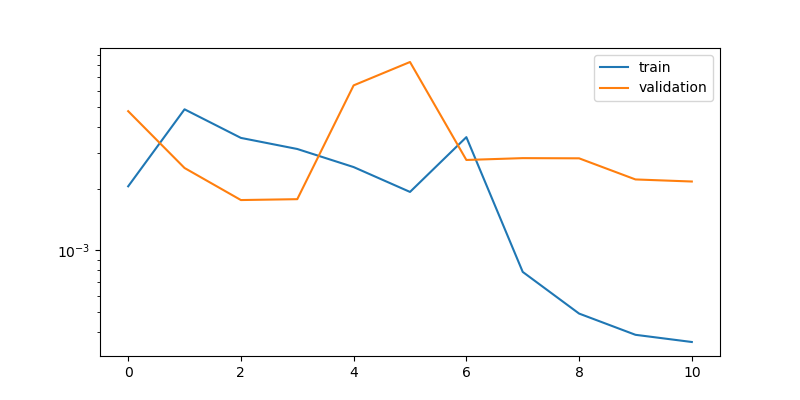

In [461]:
#Plot data
plt.close('all')
plt.figure(figsize=(8,4))
plt.semilogy(history.history['loss'], label='train')
plt.semilogy(history.history['val_loss'], label='validation')
plt.legend();

## <span style="color:#4361EE">Predicciones</span>

### Prepara los datos de validación

In [463]:
X_test.shape

(447, 60, 1)

### Calcula predicciones

In [474]:
model_01 = tf.keras.models.load_model(checkpoint_filepath)

In [475]:
# predictions
prediction1 = model_01.predict(X_test)
#prediction = scaler.inverse_transform(prediction)

 1/14 [=>............................] - ETA: 4s

2022-09-22 03:45:34.047600: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-09-22 03:45:34.102750: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 1s 17ms/step


In [476]:
print(prediction1.shape)
print(y_test.shape)


(447, 1)
(447,)


### Elimina dimensiones sobrante para los gráficos

In [477]:
y_train_p1 = y_train #np.squeeze(y_train, axis=-1)
y_test_p1 = y_test #np.squeeze(y_test, axis=-1)
y_pred_p1 = np.squeeze(prediction1, axis=-1)

In [478]:
print(y_train_p1.shape)
print(y_test_p1.shape)
print(y_pred_p1.shape)

k=0
print('|-------test------|---pred--|----------dif---------|')
for i,j in zip(y_test_p1, y_pred_p1):
    print (i,j, i-j)
    k+=1
    if k==10:
        break

(3951,)
(447,)
(447,)
|-------test------|---pred--|----------dif---------|
0.8117166929948787 0.7589259 0.0527907782304744
0.8143294686740191 0.76078475 0.05354472345764949
0.821351314991738 0.7618844 0.05946692368390716
0.8139211971674248 0.766021 0.04790018390753714
0.8134313211943003 0.7680733 0.04535800080550634
0.8140028639274408 0.7702393 0.043763570352153947
0.8112268170217541 0.77264845 0.038578363309290764
0.8068994131431919 0.77413976 0.03275965121844826
0.8040416371840033 0.77538455 0.028657091857770434
0.8036334279708949 0.77642953 0.027203894012459817


### Gráfica de las predicciones

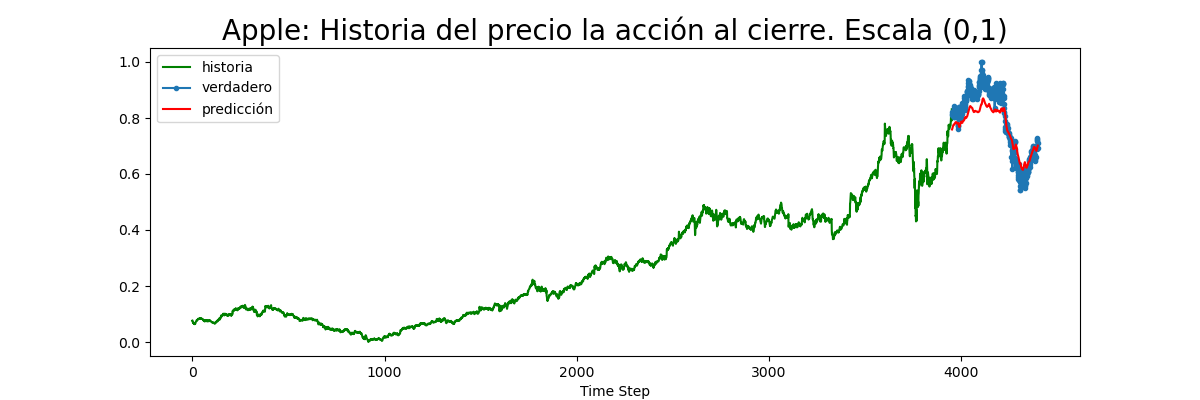

In [479]:
plt.close('all')
plt.figure(figsize=(12,4))
plt.plot(np.arange(0, len(y_train_p1)), y_train_p1, 'g', label="historia")
plt.plot(np.arange(len(y_train_p1), len(y_train_p1) + len(y_test_p1)), y_test_p1, marker='.', label="verdadero")
plt.plot(np.arange(len(y_train_p1), len(y_train_p1) + len(y_test_p1)), y_pred_p1, 'r', label="predicción")
#plt.ylabel('Valor')
plt.xlabel('Time Step')
plt.title("Apple: Historia del precio la acción al cierre. Escala (0,1)", size = 20)
plt.legend()
plt.show();

### Regreso a la escala original

In [480]:
y_pred_or1 = scaler.inverse_transform(y_pred_p1.reshape(-1,1))
y_test_or1 = scaler.inverse_transform(y_test_p1.reshape(-1,1))

In [481]:
k=0
for i,j in zip(y_test_or1, y_pred_or1):
    print (i,j, i-j)
    k+=1
    if k==10:
        break

[103.] [96.534454] [6.46554565]
[103.31999969] [96.762115] [6.55788422]
[104.18000031] [96.89679] [7.28321075]
[103.26999664] [97.40343] [5.86656952]
[103.20999908] [97.65478] [5.55522156]
[103.27999878] [97.92006] [5.35993958]
[102.94000244] [98.21512] [4.72488403]
[102.41000366] [98.397766] [4.01223755]
[102.05999756] [98.550224] [3.50977325]
[102.01000214] [98.67821] [3.33179474]


In [482]:
rmsLSTM = np.sqrt(np.mean(np.power(y_pred_or1-y_test_or1,2)))
print(rmsLSTM )

7.193339745060489


In [483]:
y_pred_or1.shape

(447, 1)

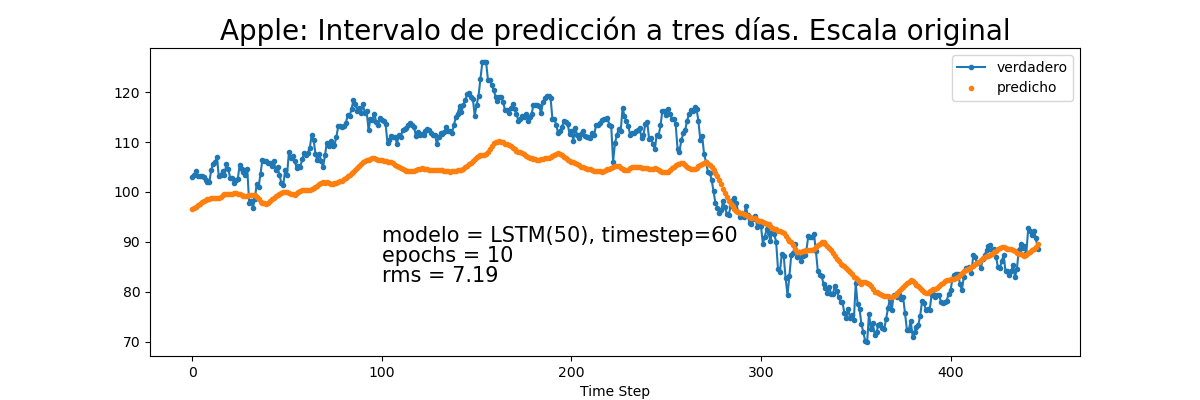

In [485]:
plt.close('all')
plt.figure(figsize=(12,4))
plt.plot(np.arange(0, len(y_test_or1)), y_test_or1, marker='.', label="verdadero")
plt.plot(np.arange(0, len(y_pred_or1)), y_pred_or1, '.', label="predicho")
plt.xlabel('Time Step')

plt.annotate("modelo = LSTM(50), timestep=60" , xy=(100, 90), size = 15)
plt.annotate(f"epochs = {history.epoch[-1]}" , xy=(100, 86), size = 15)
plt.annotate("rms = "+str(round(rmsLSTM,2)) , xy=(100, 82), size = 15)
plt.title("Apple: Intervalo de predicción a tres días. Escala original", size = 20)
plt.legend()
plt.show()

## <span style="color:#4361EE">Guarda el modelo entrenado</span>

In [384]:
model_01.save(f'../Modelos/modelo_{stock}_{future_target}_dia.h5')

## <span style="color:#4361EE">Intervalos de confianza. TO DO</span>

### Recupera la  configuración del modelo

In [385]:
print(model_01.get_config())

{'name': 'series_LSTM_model', 'layers': [{'class_name': 'InputLayer', 'config': {'batch_input_shape': (None, 60, 1), 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'input_1'}, 'name': 'input_1', 'inbound_nodes': []}, {'class_name': 'Dropout', 'config': {'name': 'Dropout_01', 'trainable': True, 'dtype': 'float32', 'rate': 0.2, 'noise_shape': None, 'seed': None}, 'name': 'Dropout_01', 'inbound_nodes': [[['input_1', 0, 0, {}]]]}, {'class_name': 'LSTM', 'config': {'name': 'LSTM_layer', 'trainable': True, 'dtype': 'float32', 'return_sequences': False, 'return_state': False, 'go_backwards': False, 'stateful': False, 'unroll': False, 'time_major': False, 'units': 50, 'activation': 'tanh', 'recurrent_activation': 'sigmoid', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}, 'shared_object_id': 2}, 'recurrent_initializer': {'class_name': 'Orthogonal', 'config': {'gain': 1.0, 'seed': None}, 'shared_object_id': 3}, 'bias_initializer': 

## <span style="color:#4361EE">Predicción en tres días</span>

In [386]:
from datetime import date
hoy = data_close.index[-past_history:][-1]
print("Hoy: ", hoy) 

Hoy:  2022-09-20 00:00:00


In [387]:
tres_dias = data_close.index[-past_history:][-1]+pd.DateOffset(3)
print("En tres días: ", tres_dias) 

En tres días:  2022-09-23 00:00:00


In [388]:
ultima_ventana = dataset[-past_history:]

ultima_ventana_tensor = np.reshape(dataset[-past_history:], (1,past_history, 1))

# predictions
prediction1 = model_01.predict(ultima_ventana_tensor)

# Escalas originales
ultima_ventana_or = scaler.inverse_transform(ultima_ventana.reshape(-1,1))
prediction_or = scaler.inverse_transform(prediction1)[0]

1/1 [==============================] - 0s 51ms/step


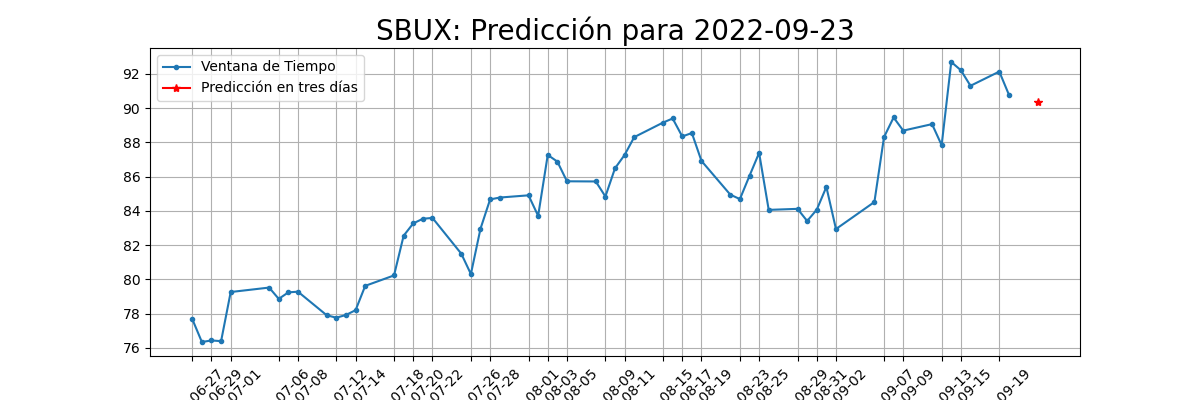

In [389]:
plt.close('all')
plt.figure(figsize=(12,4))
plt.plot(data_close.index[-past_history:], ultima_ventana_or, marker='.', label="Ventana de Tiempo")
plt.plot(tres_dias, prediction_or, marker='*', label="Predicción en tres días", color='r')

plt.xlabel('Tiempo')
plt.title(f"{stock}: Predicción para {tres_dias.date()}", size = 20)
plt.xticks(data_close.index[-past_history:][::2], rotation=45)
plt.legend()
plt.grid()
plt.show();

In [390]:
prediction_or

array([90.37829], dtype=float32)

## <span style="color:#4361EE">Crea el modelo LSTM bidirecional</span>

In [330]:
# shapes
input_shape = (X_train.shape[1], X_train.shape[2])
units_2 = 64
dropout = 0.2

# layers
inputs = Input(input_shape)
x = Dropout(dropout, name= 'Dropout_01')(inputs)
x = Bidirectional(LSTM(units, return_sequences=True,dropout=dropout,
    recurrent_dropout=dropout,))(x)
x = Bidirectional(LSTM(units//4, dropout=dropout,
    recurrent_dropout=dropout,))(x)
x = Dropout(dropout, name= 'Dropout_02')(x)
outputs = Dense(1)(x)

# model
model_02 = Model(inputs=inputs, outputs=outputs, name='series_LSTM_model')
model_02.summary()

Model: "series_LSTM_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 60, 1)]           0         
                                                                 
 Dropout_01 (Dropout)        (None, 60, 1)             0         
                                                                 
 bidirectional (Bidirectiona  (None, 60, 100)          20800     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 24)               10848     
 nal)                                                            
                                                                 
 Dropout_02 (Dropout)        (None, 24)                0         
                                                                 
 dense_5 (Dense)             (None, 1)           

###  Compila

Se usará el optimizador Adam y la función de pérdida MSE

In [331]:
model_02.compile(loss='mean_squared_error',
  optimizer=Adam(0.001),metrics=["mae"])


In [119]:
tf.random.set_seed(500)

history = model_02.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.1,
    verbose=1,
    shuffle=False
)

Epoch 1/10
34/34 [==============================] - 112s 2s/step - loss: 0.0034 - mae: 0.0463 - val_loss: 0.0085 - val_mae: 0.0879
Epoch 2/10
34/34 [==============================] - 63s 2s/step - loss: 0.0046 - mae: 0.0600 - val_loss: 0.0033 - val_mae: 0.0523
Epoch 3/10
34/34 [==============================] - 59s 2s/step - loss: 0.0021 - mae: 0.0356 - val_loss: 0.0011 - val_mae: 0.0258
Epoch 4/10
34/34 [==============================] - 57s 2s/step - loss: 0.0035 - mae: 0.0497 - val_loss: 5.8654e-04 - val_mae: 0.0192
Epoch 5/10
34/34 [==============================] - 62s 2s/step - loss: 0.0020 - mae: 0.0370 - val_loss: 7.4103e-04 - val_mae: 0.0211
Epoch 6/10
34/34 [==============================] - 58s 2s/step - loss: 0.0018 - mae: 0.0359 - val_loss: 6.0171e-04 - val_mae: 0.0196
Epoch 7/10
34/34 [==============================] - 63s 2s/step - loss: 0.0013 - mae: 0.0234 - val_loss: 0.0022 - val_mae: 0.0401
Epoch 8/10
34/34 [==============================] - 60s 2s/step - loss: 0.002

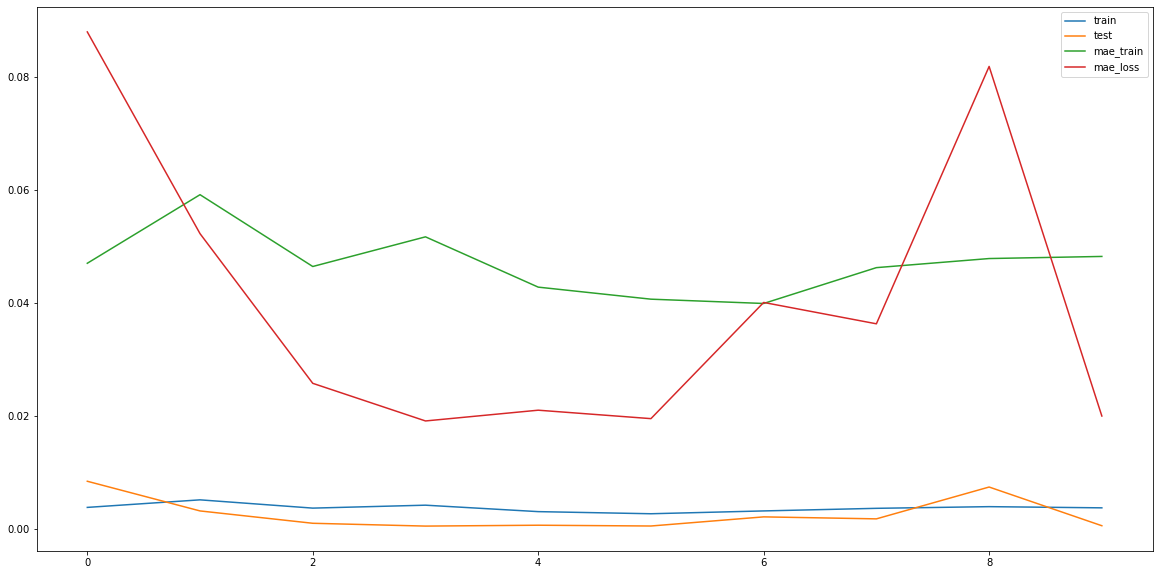

In [120]:
plt.plot(history.history['loss'][:], label='train')
plt.plot(history.history['val_loss'][:], label='test')
plt.plot(history.history['mae'][:], label='mae_train')
plt.plot(history.history['val_mae'][:], label='mae_loss')
plt.legend();

## <span style="color:#4361EE">Predicciones</span>

### Prepara los datos de validación

In [121]:
X_test.shape

(543, 60, 1)

### Calcula predicciones

In [122]:
# predictions
prediction2 = model_02.predict(X_test)
#prediction = scaler.inverse_transform(prediction)

In [124]:
print(prediction2.shape)
print(y_test.shape)


(543, 1)
(543,)


### Elimina dimensiones sobrante para los gráficos

In [125]:
y_train_p2 = y_train #np.squeeze(y_train, axis=-1)
y_test_p2 = y_test#np.squeeze(y_test, axis=-1)
y_pred_p2 = np.squeeze(prediction2, axis=-1)

In [126]:
print(y_train_p2.shape)
print(y_test_p2.shape)
print(y_pred_p2.shape)

k=0
for i,j in zip(y_test_p2, y_pred_p2):
    print (i,j, i-j)
    k+=1
    if k==10:
        break

(2355,)
(543,)
(543,)
0.6783307719588605 0.66155297 0.01677780631783876
0.6719470386570517 0.66234887 0.009598172194344223
0.6727745596406196 0.6638678 0.008906788015100808
0.6698782361981322 0.66457427 0.005303970718090745
0.6474169523584349 0.66511256 -0.017695602668573174
0.6435157820073296 0.665191 -0.021675212732202853
0.6412105449816764 0.6639345 -0.022723983845990836
0.6212318240926825 0.6625547 -0.04132285720843443
0.6321078141624307 0.66143036 -0.02932254472428808
0.6292114907199433 0.66006935 -0.03085785570797417


### Gráfica de las predicciones

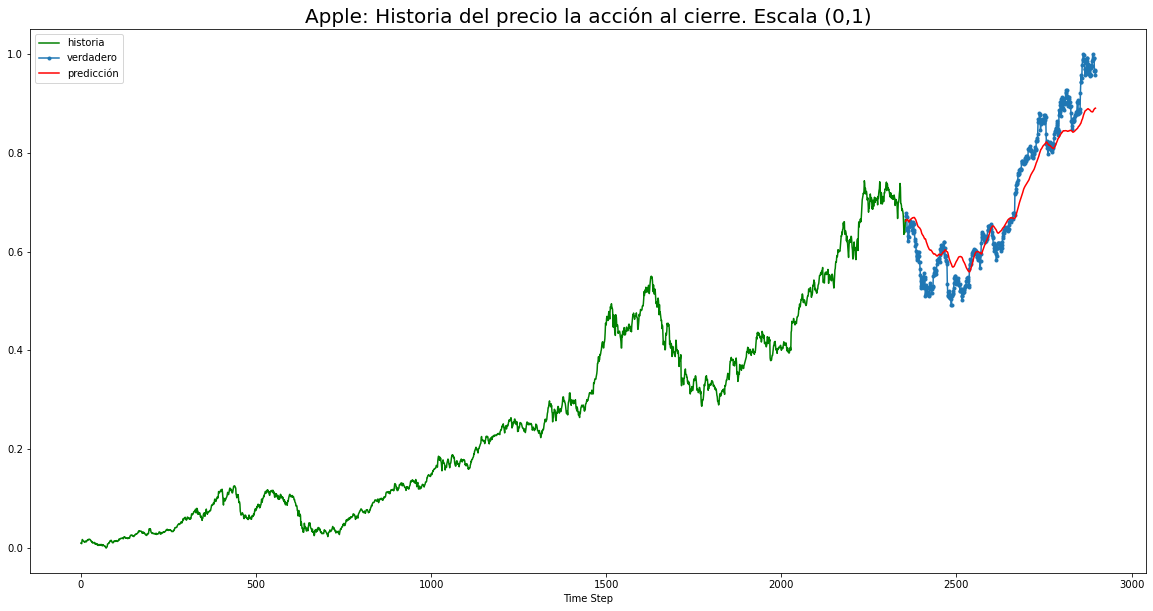

In [127]:
plt.plot(np.arange(0, len(y_train_p2)), y_train_p2, 'g', label="historia")
plt.plot(np.arange(len(y_train_p2), len(y_train_p2) + len(y_test_p2)), y_test_p2, marker='.', label="verdadero")
plt.plot(np.arange(len(y_train_p2), len(y_train_p2) + len(y_test_p2)), y_pred_p2, 'r', label="predicción")
#plt.ylabel('Valor')
plt.xlabel('Time Step')
plt.title("Apple: Historia del precio la acción al cierre. Escala (0,1)", size = 20)
plt.legend()
plt.show();

### Regreso a la escala original

In [129]:
y_pred_or2 = scaler.inverse_transform(y_pred_p2.reshape(-1,1))
y_test_or2 = scaler.inverse_transform(y_test_p2.reshape(-1,1))

In [130]:
k=0
for i,j in zip(y_test_or2, y_pred_or2):
    print (i,j, i-j)
    k+=1
    if k==10:
        break

[122.] [119.16153] [2.83847046]
[120.92] [119.29618] [1.62381927]
[121.06] [119.55315] [1.50685364]
[120.57] [119.67267] [0.89733154]
[116.77] [119.76374] [-2.99374054]
[116.11] [119.77701] [-3.66700806]
[115.72] [119.56444] [-3.84443787]
[112.34] [119.331] [-6.99100128]
[114.18] [119.140785] [-4.96078522]
[113.69] [118.91053] [-5.22053009]


In [132]:
rmsLSTM = np.sqrt(np.mean(np.power(y_pred_or2-y_test_or2,2)))
print(rmsLSTM )

8.763895448817458


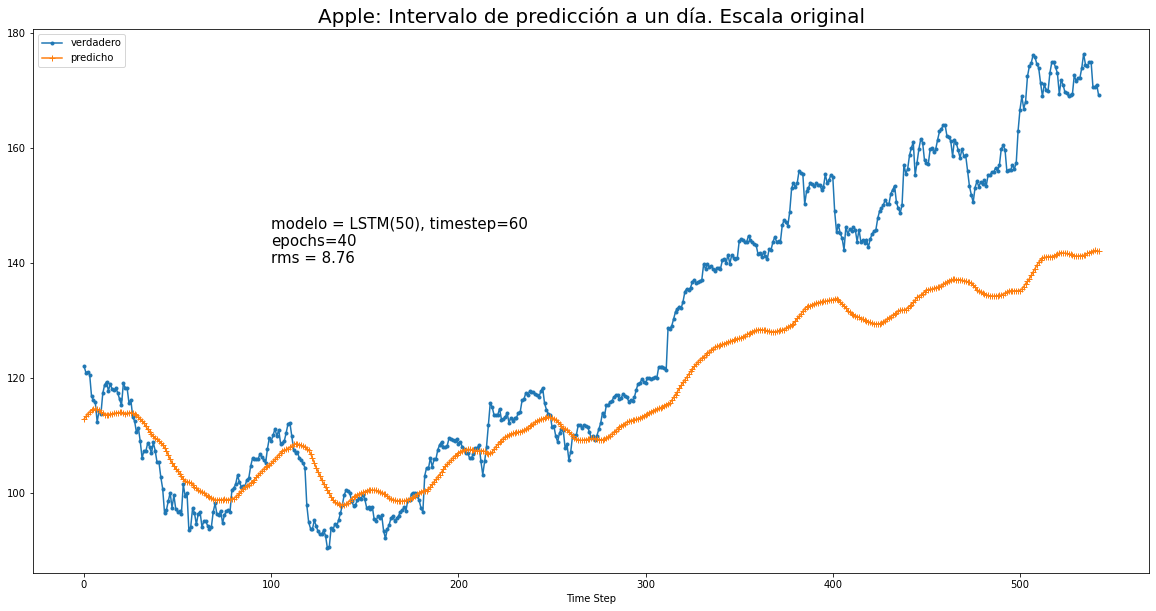

In [133]:
plt.plot(np.arange(0, len(y_test_or)), y_test_or, marker='.', label="verdadero")
plt.plot(np.arange(0, len(y_test_or)), y_pred_or, marker='+', label="predicho")
plt.xlabel('Time Step')
plt.annotate("rms = "+str(round(rmsLSTM,2)) , xy=(100, 140), size = 15)
plt.annotate("modelo = LSTM(50), timestep=60" , xy=(100, 146), size = 15)
plt.annotate("epochs=40" , xy=(100, 143), size = 15)
plt.title("Apple: Intervalo de predicción a un día. Escala original", size = 20)
plt.legend()
plt.show();